# **Importing all necessary**

In [ ]:
import pandas as pd
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import spacy
from textblob import TextBlob
import string,time
import nltk
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.stem import WordNetLemmatizer
import os

In [ ]:
!pip install requests
!pip install nltk
import requests

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# **Reading the Dataset**

In [ ]:
df = pd.read_excel('/content/Input.xlsx')

In [ ]:
df

,URL_ID,URL
0,blackassign0001,https://insights.blackcoffer.com/rising-it-cit...
1,blackassign0002,https://insights.blackcoffer.com/rising-it-cit...
2,blackassign0003,https://insights.blackcoffer.com/internet-dema...
3,blackassign0004,https://insights.blackcoffer.com/rise-of-cyber...
4,blackassign0005,https://insights.blackcoffer.com/ott-platform-...
...,...,...
95,blackassign0096,https://insights.blackcoffer.com/what-is-the-r...
96,blackassign0097,https://insights.blackcoffer.com/impact-of-cov...
97,blackassign0098,https://insights.blackcoffer.com/contribution-...
98,blackassign0099,https://insights.blackcoffer.com/how-covid-19-...


# **Extracting the Title and Text Description From URL**

In [ ]:
url = "https://www.example.com"

In [ ]:
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

In [ ]:
for index, row in df.iterrows():
    url = row['URL']
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    # Check if the element is present
    if soup.find('h1', class_='entry-title') is not None:
        article_title = soup.find('h1', class_='entry-title').text.strip()
        print(f"Title found: {article_title}")
    else:
        print(f"Title not found for URL: {url}")

Title found: Rising IT cities and its impact on the economy, environment, infrastructure, and city life by the year 2040.
Title found: Rising IT Cities and Their Impact on the Economy, Environment, Infrastructure, and City Life in Future
Title found: Internet Demand’s Evolution, Communication Impact, and 2035’s Alternative Pathways
Title found: Rise of Cybercrime and its Effect in upcoming Future
Title found: OTT platform and its impact on the entertainment industry in Future.
Title found: The rise of the OTT platform and its impact on the entertainment industry by 2040.
Title found: Rise of Cyber Crime and its Effects
Title found: Rise of Internet Demand and Its Impact on Communications and Alternatives by the Year 2035
Title found: Rise of Cybercrime and its Effect by the Year 2040.
Title found: Rise of Cybercrime and its Effect by the Year 2040.
Title found: Rise of Internet Demand and its Impact on Communications and Alternatives by the Year 2035.
Title found: Rise of telemedicine 

In [ ]:

for index, row in df.iterrows():
    url = row['URL']
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    # Check if the element is present
    if soup.find('h1', class_='entry-title') is not None:
        article_title = soup.find('h1', class_='entry-title').text.strip()
    else:
        article_title = "Title not found"

    # Extract article text
    article_text = ''
    description_tag = soup.find('div', class_='td-post-content tagdiv-type')
    if description_tag:
        for paragraph in description_tag.find_all(['p', 'ol']):
            article_text += paragraph.get_text().strip() + '\n'

    # Store the extracted title and text

In [ ]:
# Initialize empty lists to store extracted data
article_titles = []
article_texts = []

# Loop through each row in the DataFrame
for index, row in df.iterrows():
    url = row['URL']
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    # Check if the element is present
    if soup.find('h1', class_='entry-title') is not None:
        article_title = soup.find('h1', class_='entry-title').text.strip()
    else:
        article_title = "Title not found"

    # Extract article text
    article_text = ''
    description_tag = soup.find('div', class_='td-post-content tagdiv-type')
    if description_tag:
        for paragraph in description_tag.find_all(['p', 'ol']):
            article_text += paragraph.get_text().strip() + '\n'

    # Append extracted data to lists
    article_titles.append(article_title)
    article_texts.append(article_text)

# Add new columns to the DataFrame
df['Article Title'] = article_titles
df['Article Text'] = article_texts

# Print the updated DataFrame
print(df)

             URL_ID                                                URL  \
0   blackassign0001  https://insights.blackcoffer.com/rising-it-cit...   
1   blackassign0002  https://insights.blackcoffer.com/rising-it-cit...   
2   blackassign0003  https://insights.blackcoffer.com/internet-dema...   
3   blackassign0004  https://insights.blackcoffer.com/rise-of-cyber...   
4   blackassign0005  https://insights.blackcoffer.com/ott-platform-...   
..              ...                                                ...   
95  blackassign0096  https://insights.blackcoffer.com/what-is-the-r...   
96  blackassign0097  https://insights.blackcoffer.com/impact-of-cov...   
97  blackassign0098  https://insights.blackcoffer.com/contribution-...   
98  blackassign0099  https://insights.blackcoffer.com/how-covid-19-...   
99  blackassign0100  https://insights.blackcoffer.com/how-will-covi...   

                                        Article Title  \
0   Rising IT cities and its impact on the economy... 

In [ ]:
df

,URL_ID,URL,Article Title,Article Text
0,blackassign0001,https://insights.blackcoffer.com/rising-it-cit...,Rising IT cities and its impact on the economy...,We have seen a huge development and dependence...
1,blackassign0002,https://insights.blackcoffer.com/rising-it-cit...,Rising IT Cities and Their Impact on the Econo...,"Throughout history, from the industrial revolu..."
2,blackassign0003,https://insights.blackcoffer.com/internet-dema...,"Internet Demand’s Evolution, Communication Imp...",Introduction\nIn the span of just a few decade...
3,blackassign0004,https://insights.blackcoffer.com/rise-of-cyber...,Rise of Cybercrime and its Effect in upcoming ...,"The way we live, work, and communicate has unq..."
4,blackassign0005,https://insights.blackcoffer.com/ott-platform-...,OTT platform and its impact on the entertainme...,The year 2040 is poised to witness a continued...
...,...,...,...,...
95,blackassign0096,https://insights.blackcoffer.com/what-is-the-r...,Due to the COVID-19 the repercussion of the en...,"Epidemics, in general, have both direct and in..."
96,blackassign0097,https://insights.blackcoffer.com/impact-of-cov...,Impact of COVID-19 pandemic on office space an...,COVID 19 has bought the world to its knees. Wi...
97,blackassign0098,https://insights.blackcoffer.com/contribution-...,Contribution of handicrafts (Visual Arts & Lit...,Handicrafts is an art of making crafts by hand...
98,blackassign0099,https://insights.blackcoffer.com/how-covid-19-...,Title not found,


In [ ]:
df['URL'][0]

'https://insights.blackcoffer.com/rising-it-cities-and-its-impact-on-the-economy-environment-infrastructure-and-city-life-by-the-year-2040-2/'

In [ ]:
df['Article Title'][0]

'Rising IT cities and its impact on the economy, environment, infrastructure, and city life by the year 2040.'

In [ ]:
df['Article Text'][0]

'We have seen a huge development and dependence of people on technology in recent years. We have also seen the development of AI and ChatGPT in recent years. So it is a normal thing that we will become fully dependent on technology by 2040. Information technology will be a major power for all the developing nations. As a member of a developing nation, India is rapidly growing its IT base. It has also grown some IT cities which will be the major control centres for Information technology by 2040.\nRising IT cities\nNoida:- Noida in Uttar Pradesh near New Delhi is an emerging IT sector now. Many large companies like Google, Microsoft, IBM, Infosys and others have set up their companies here. Noida has a market base of billions of dollars and is doing a great job of boosting the national economy. The establishment of so many software companies has made Noida an information technology hub.\nGurgaon:- Gurgaon in Haryana is also an emerging IT hub. Many large companies like Google, Microsoft

# **Text preprocessing**

In [ ]:
stop_words = set(stopwords.words('english'))


# Function for text preprocessing
def preprocess_text(text):
    # Lowercasing
    text = text.lower()
    # Remove HTML tags
    text = re.sub('<.*?>', '', text)
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Tokenization
    tokens = word_tokenize(text)
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if not word in stopwords.words('english')]
    # Join tokens to form processed text
    processed_text = ' '.join(tokens)
    return processed_text

# Assuming df is your DataFrame and 'text' is the column containing text
df['processed_text'] = df['Article Text'].apply(preprocess_text)


In [ ]:
df

,URL_ID,URL,Article Title,Article Text,processed_text
0,blackassign0001,https://insights.blackcoffer.com/rising-it-cit...,Rising IT cities and its impact on the economy...,We have seen a huge development and dependence...,seen huge development dependence people techno...
1,blackassign0002,https://insights.blackcoffer.com/rising-it-cit...,Rising IT Cities and Their Impact on the Econo...,"Throughout history, from the industrial revolu...",throughout history industrial revolution 18th ...
2,blackassign0003,https://insights.blackcoffer.com/internet-dema...,"Internet Demand’s Evolution, Communication Imp...",Introduction\nIn the span of just a few decade...,introduction span decade internet undergone as...
3,blackassign0004,https://insights.blackcoffer.com/rise-of-cyber...,Rise of Cybercrime and its Effect in upcoming ...,"The way we live, work, and communicate has unq...",way live work communicate unquestionably chang...
4,blackassign0005,https://insights.blackcoffer.com/ott-platform-...,OTT platform and its impact on the entertainme...,The year 2040 is poised to witness a continued...,year 2040 poised witness continued revolution ...
...,...,...,...,...,...
95,blackassign0096,https://insights.blackcoffer.com/what-is-the-r...,Due to the COVID-19 the repercussion of the en...,"Epidemics, in general, have both direct and in...",epidemic general direct indirect cost associat...
96,blackassign0097,https://insights.blackcoffer.com/impact-of-cov...,Impact of COVID-19 pandemic on office space an...,COVID 19 has bought the world to its knees. Wi...,covid 19 bought world knee business shut trave...
97,blackassign0098,https://insights.blackcoffer.com/contribution-...,Contribution of handicrafts (Visual Arts & Lit...,Handicrafts is an art of making crafts by hand...,handicraft art making craft hand india called ...
98,blackassign0099,https://insights.blackcoffer.com/how-covid-19-...,Title not found,,


In [ ]:
# prompt: hoe many Article Title	 column has title not found

df['Article Title'][df['Article Title'] == 'Title not found'].count()


11

In [ ]:
df.isnull().sum()

URL_ID            0
URL               0
Article Title     0
Article Text      0
processed_text    0
dtype: int64

In [ ]:
df['processed_text'][0]

'seen huge development dependence people technology recent year also seen development ai chatgpt recent year normal thing become fully dependent technology 2040 information technology major power developing nation member developing nation india rapidly growing base also grown city major control centre information technology 2040 rising city noida noida uttar pradesh near new delhi emerging sector many large company like google microsoft ibm infosys others set company noida market base billion dollar great job boosting national economy establishment many software company made noida information technology hub gurgaon gurgaon haryana also emerging hub many large company like google microsoft ibm infosys others set company gurgaon market base billion dollar great job boosting national economy bengaluru bengaluru called hub india also smart city many large company like google microsoft ibm infosys others set company bengaluru market base billion dollar great job boosting national economy ko

In [ ]:
# prompt: find the character length for df['processed_text'][0]

print(len(df['processed_text'][0]))

print(len(df['Article Text'][0]))


4432
6875


In [ ]:
corpus = df['processed_text'].tolist()

In [ ]:
corpus[0]

'seen huge development dependence people technology recent year also seen development ai chatgpt recent year normal thing become fully dependent technology 2040 information technology major power developing nation member developing nation india rapidly growing base also grown city major control centre information technology 2040 rising city noida noida uttar pradesh near new delhi emerging sector many large company like google microsoft ibm infosys others set company noida market base billion dollar great job boosting national economy establishment many software company made noida information technology hub gurgaon gurgaon haryana also emerging hub many large company like google microsoft ibm infosys others set company gurgaon market base billion dollar great job boosting national economy bengaluru bengaluru called hub india also smart city many large company like google microsoft ibm infosys others set company bengaluru market base billion dollar great job boosting national economy ko

# **Making the Dictionary for postive and negative word**

In [ ]:
from collections import defaultdict
from textblob import TextBlob
'''
# Example Corpus
corpus = [
    "This is a positive sentence with happy and joyful words.",
    "This is a negative sentence with sad and unhappy words."
]
'''
# Tokenize each document in the corpus and assign sentiment scores to words
word_sentiments = defaultdict(int)  # Dictionary to store sentiment scores of words

for document in corpus:
    blob = TextBlob(document)
    for word in blob.words:
        sentiment = TextBlob(word).sentiment.polarity
        if sentiment > 0:
            word_sentiments[word] += 1  # Positive sentiment
        elif sentiment < 0:
            word_sentiments[word] -= 1  # Negative sentiment

# Construct positive and negative dictionaries
positive_dict = {word: score for word, score in word_sentiments.items() if score > 0}
negative_dict = {word: score for word, score in word_sentiments.items() if score < 0}

# Print positive and negative dictionaries
print("Positive Dictionary:")
print(positive_dict)
print("\nNegative Dictionary:")
print(negative_dict)

Positive Dictionary:
{'huge': 41, 'normal': 15, 'major': 59, 'near': 12, 'new': 189, 'many': 148, 'large': 57, 'great': 42, 'smart': 35, 'free': 11, 'greatly': 9, 'ready': 9, 'highly': 18, 'economic': 52, 'smoothly': 2, 'good': 79, 'healthy': 10, 'safely': 5, 'surely': 9, 'perfectly': 2, 'nearly': 14, 'excellent': 8, 'adequate': 8, 'primary': 14, 'better': 111, 'advanced': 20, 'considerably': 2, 'greatest': 9, 'effective': 33, 'innovative': 12, 'important': 91, 'generally': 13, 'main': 21, 'significant': 68, 'higher': 23, 'stunning': 1, 'fresh': 17, 'unexpected': 7, 'bright': 3, 'significantly': 23, 'top': 32, 'primarily': 3, 'first': 79, 'tremendous': 5, 'mostly': 6, 'real': 30, 'whole': 20, 'unusually': 1, 'high': 44, 'fair': 7, 'social': 110, 'thanks': 11, 'vibrant': 3, 'fairly': 1, 'astounding': 1, 'becoming': 21, 'promising': 5, 'profound': 13, 'seamless': 12, 'notable': 3, 'engaging': 8, 'sensitive': 13, 'striking': 4, 'responsible': 24, 'ethical': 9, 'directly': 16, 'direct': 22

In [ ]:
len(positive_dict),len(negative_dict)

(341, 225)

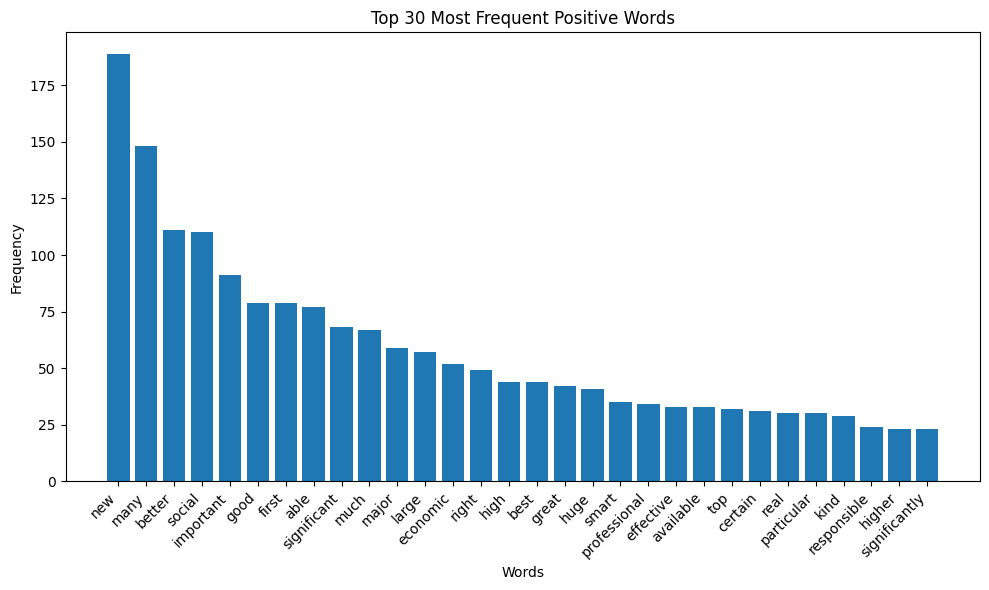

In [ ]:
# sort this postive dict based on values in descending order and plot  only top 30 word that which word is frequence is more


# Sort positive dictionary by values in descending order
sorted_positive_dict = dict(sorted(positive_dict.items(), key=lambda item: item[1], reverse=True))

# Extract top 30 words with highest frequency
top_30_positive_words = list(sorted_positive_dict.keys())[:30]
top_30_positive_values = list(sorted_positive_dict.values())[:30]

# Plot the top 30 positive words and their frequencies
plt.figure(figsize=(10, 6))
plt.bar(top_30_positive_words, top_30_positive_values)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 30 Most Frequent Positive Words")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
negative_dict

{'base': -18,
 'raw': -8,
 'mean': -54,
 'cutting': -3,
 'due': -97,
 'center': -18,
 'waste': -22,
 'behind': -19,
 'negative': -22,
 'half': -10,
 'artificial': -85,
 'careful': -4,
 'expected': -38,
 'rank': -3,
 'average': -19,
 'extreme': -9,
 'impossible': -10,
 'roughly': -4,
 'heavily': -10,
 'complex': -22,
 'remote': -31,
 'difficult': -22,
 'small': -33,
 'limited': -19,
 'narrow': -4,
 'previously': -9,
 'failure': -8,
 'conventional': -17,
 'everyday': -5,
 'vulnerable': -12,
 'sinister': -1,
 'dangerous': -9,
 'devastating': -6,
 'disastrous': -2,
 'military': -3,
 'tense': -1,
 'mental': -28,
 'criminal': -10,
 'mundane': -1,
 'wide': -10,
 'mere': -7,
 'nostalgic': -1,
 'merely': -5,
 'broken': -3,
 'active': -7,
 'game': -71,
 'weak': -2,
 'past': -46,
 'harder': -3,
 'closed': -6,
 'illegal': -8,
 'serious': -10,
 'negatively': -2,
 'long': -37,
 'victim': -4,
 'typical': -4,
 'widely': -6,
 'common': -23,
 'slow': -2,
 'decreased': -6,
 'little': -7,
 'remotely': -18

In [ ]:
positive_dict

{'huge': 41,
 'normal': 15,
 'major': 59,
 'near': 12,
 'new': 189,
 'many': 148,
 'large': 57,
 'great': 42,
 'smart': 35,
 'free': 11,
 'greatly': 9,
 'ready': 9,
 'highly': 18,
 'economic': 52,
 'smoothly': 2,
 'good': 79,
 'healthy': 10,
 'safely': 5,
 'surely': 9,
 'perfectly': 2,
 'nearly': 14,
 'excellent': 8,
 'adequate': 8,
 'primary': 14,
 'better': 111,
 'advanced': 20,
 'considerably': 2,
 'greatest': 9,
 'effective': 33,
 'innovative': 12,
 'important': 91,
 'generally': 13,
 'main': 21,
 'significant': 68,
 'higher': 23,
 'stunning': 1,
 'fresh': 17,
 'unexpected': 7,
 'bright': 3,
 'significantly': 23,
 'top': 32,
 'primarily': 3,
 'first': 79,
 'tremendous': 5,
 'mostly': 6,
 'real': 30,
 'whole': 20,
 'unusually': 1,
 'high': 44,
 'fair': 7,
 'social': 110,
 'thanks': 11,
 'vibrant': 3,
 'fairly': 1,
 'astounding': 1,
 'becoming': 21,
 'promising': 5,
 'profound': 13,
 'seamless': 12,
 'notable': 3,
 'engaging': 8,
 'sensitive': 13,
 'striking': 4,
 'responsible': 24,


# **Saving the Dictionary**

In [ ]:

with open('negative_dict.txt', 'w') as f:
    for word, score in negative_dict.items():
        f.write(f"{word}:{score}\n")

with open('positive_dict.txt', 'w') as f:
    for word, score in positive_dict.items():
        f.write(f"{word}:{score}\n")

# **Creating Calculating feature/variable**

1. Positive Score
2. Negative Score
3. Polarity Score
4. Subjectivity Score

In [ ]:

import pandas as pd
from nltk.tokenize import word_tokenize
from textblob import TextBlob
from collections import defaultdict



# Define positive and negative dictionaries
positive_dict = positive_dict
negative_dict = negative_dict

# Function to calculate sentiment scores
def calculate_sentiment_scores(text):
    # Tokenize and convert text to lowercase
    tokens = word_tokenize(text.lower())
    total_words = len(tokens)  # Count total words

    # Dictionary to store sentiment scores of words
    word_sentiments = defaultdict(int)

    # Count positive and negative words
    for word in tokens:
        sentiment = TextBlob(word).sentiment.polarity
        if sentiment > 0:
            word_sentiments[word] += 1  # Positive sentiment
        elif sentiment < 0:
            word_sentiments[word] -= 1  # Negative sentiment

    # Calculate positive and negative scores
    positive_score = sum(word_sentiments[word] for word in word_sentiments if word_sentiments[word] > 0)
    negative_score = sum(-word_sentiments[word] for word in word_sentiments if word_sentiments[word] < 0)

    # Calculate polarity score
    polarity_score = (positive_score - negative_score) / (positive_score + negative_score + 0.000001)

    # Calculate subjectivity score
    subjectivity_score = (positive_score + negative_score) / (total_words + 0.000001)

    return positive_score, negative_score, polarity_score, subjectivity_score

# Apply sentiment analysis function to each article text
sentiment_scores = df['processed_text'].apply(lambda x: calculate_sentiment_scores(x))

# Add sentiment scores as new columns to the DataFrame
df[['Positive Score', 'Negative Score', 'Polarity Score', 'Subjectivity Score']] = pd.DataFrame(sentiment_scores.tolist(), index=df.index)



In [ ]:
df.head()

,URL_ID,URL,Article Title,Article Text,processed_text,Positive Score,Negative Score,Polarity Score,Subjectivity Score,Average Sentence Length,Percentage of Complex Words,Fog Index,Average Words Per Sentence,Word Count,Syllable Per Word,Personal Pronouns,Complex Word Count,Average Word Length
0,blackassign0001,https://insights.blackcoffer.com/rising-it-cit...,Rising IT cities and its impact on the economy...,We have seen a huge development and dependence...,seen huge development dependence people techno...,65,11,0.710526,0.120444,631.0,34.389857,266.155943,631.0,631,2.161648,0,177,6.025357
1,blackassign0002,https://insights.blackcoffer.com/rising-it-cit...,Rising IT Cities and Their Impact on the Econo...,"Throughout history, from the industrial revolu...",throughout history industrial revolution 18th ...,62,25,0.425287,0.099542,874.0,51.372998,370.149199,874.0,874,2.504577,0,390,6.975973
2,blackassign0003,https://insights.blackcoffer.com/internet-dema...,"Internet Demand’s Evolution, Communication Imp...",Introduction\nIn the span of just a few decade...,introduction span decade internet undergone as...,33,13,0.434783,0.069382,663.0,65.610860,291.444344,663.0,663,2.832579,0,382,7.882353
3,blackassign0004,https://insights.blackcoffer.com/rise-of-cyber...,Rise of Cybercrime and its Effect in upcoming ...,"The way we live, work, and communicate has unq...",way live work communicate unquestionably chang...,32,22,0.185185,0.081203,665.0,60.000000,290.000000,665.0,665,2.685714,0,352,7.595489
4,blackassign0005,https://insights.blackcoffer.com/ott-platform-...,OTT platform and its impact on the entertainme...,The year 2040 is poised to witness a continued...,year 2040 poised witness continued revolution ...,18,1,0.894737,0.046569,408.0,55.147059,185.258824,408.0,408,2.382353,0,173,7.031863


In [ ]:
# remove the record from dataframe where Article Title	 is Title not found

df = df[df['Article Title'] != 'Title not found']


# **Creating Calculating feature/variable**

1. Average Sentence Length
2. Percentage of Complex Words
3. Fog Index


In [ ]:
import pandas as pd
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords



# Function to calculate readability scores
def calculate_readability_scores(text):
    # Tokenize text into sentences
    sentences = sent_tokenize(text)

    # Calculate average sentence length
    total_words = len(word_tokenize(text))
    num_sentences = len(sentences)
    avg_sentence_length = total_words / num_sentences

    # Calculate percentage of complex words
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text.lower())
    num_complex_words = sum(1 for word in words if len(word) > 6 and word not in stop_words)  # Assuming complex words have more than 6 characters
    percentage_complex_words = (num_complex_words / total_words) * 100

    # Calculate Fog Index
    fog_index = 0.4 * (avg_sentence_length + percentage_complex_words)

    return avg_sentence_length, percentage_complex_words, fog_index

# Apply readability analysis function to each article text
readability_scores = df['processed_text'].apply(lambda x: calculate_readability_scores(x))

# Add readability scores as new columns to the DataFrame
df[['Average Sentence Length', 'Percentage of Complex Words', 'Fog Index']] = pd.DataFrame(readability_scores.tolist(), index=df.index)



In [ ]:
df

,URL_ID,URL,Article Title,Article Text,processed_text,Positive Score,Negative Score,Polarity Score,Subjectivity Score,Average Sentence Length,Percentage of Complex Words,Fog Index,Average Words Per Sentence
0,blackassign0001,https://insights.blackcoffer.com/rising-it-cit...,Rising IT cities and its impact on the economy...,We have seen a huge development and dependence...,seen huge development dependence people techno...,65,11,0.710526,0.120444,631.0,34.389857,266.155943,631.0
1,blackassign0002,https://insights.blackcoffer.com/rising-it-cit...,Rising IT Cities and Their Impact on the Econo...,"Throughout history, from the industrial revolu...",throughout history industrial revolution 18th ...,62,25,0.425287,0.099542,874.0,51.372998,370.149199,874.0
2,blackassign0003,https://insights.blackcoffer.com/internet-dema...,"Internet Demand’s Evolution, Communication Imp...",Introduction\nIn the span of just a few decade...,introduction span decade internet undergone as...,33,13,0.434783,0.069382,663.0,65.610860,291.444344,663.0
3,blackassign0004,https://insights.blackcoffer.com/rise-of-cyber...,Rise of Cybercrime and its Effect in upcoming ...,"The way we live, work, and communicate has unq...",way live work communicate unquestionably chang...,32,22,0.185185,0.081203,665.0,60.000000,290.000000,665.0
4,blackassign0005,https://insights.blackcoffer.com/ott-platform-...,OTT platform and its impact on the entertainme...,The year 2040 is poised to witness a continued...,year 2040 poised witness continued revolution ...,18,1,0.894737,0.046569,408.0,55.147059,185.258824,408.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,blackassign0094,https://insights.blackcoffer.com/gaming-disord...,Gaming Disorder and Effects of Gaming on Health.,Perhaps the virtual illusion has become today’...,perhaps virtual illusion become today new real...,37,34,0.042254,0.112878,629.0,42.925278,268.770111,629.0
94,blackassign0095,https://insights.blackcoffer.com/what-is-the-r...,What is the repercussion of the environment du...,What is COVID 19 pandemic?\nOn 31st December 2...,covid 19 pandemic 31st december 2019 novel cor...,27,14,0.317073,0.111717,367.0,43.051771,164.020708,367.0
95,blackassign0096,https://insights.blackcoffer.com/what-is-the-r...,Due to the COVID-19 the repercussion of the en...,"Epidemics, in general, have both direct and in...",epidemic general direct indirect cost associat...,44,26,0.257143,0.108359,646.0,52.167183,279.266873,646.0
96,blackassign0097,https://insights.blackcoffer.com/impact-of-cov...,Impact of COVID-19 pandemic on office space an...,COVID 19 has bought the world to its knees. Wi...,covid 19 bought world knee business shut trave...,24,24,0.000000,0.092131,521.0,40.499040,224.599616,521.0


# **Creating the feature like Average Words Per Sentence**

In [ ]:
import pandas as pd
from nltk.tokenize import sent_tokenize, word_tokenize


# Function to calculate the average number of words per sentence
def calculate_avg_words_per_sentence(text):
    # Tokenize text into sentences and words
    sentences = sent_tokenize(text)
    words = word_tokenize(text)

    # Calculate total number of words and sentences
    total_words = len(words)
    total_sentences = len(sentences)

    # Calculate average number of words per sentence
    if total_sentences > 0:
        avg_words_per_sentence = total_words / total_sentences
    else:
        avg_words_per_sentence = 0

    return avg_words_per_sentence

# Apply function to each article text
df['Average Words Per Sentence'] = df['processed_text'].apply(calculate_avg_words_per_sentence)

# Print the updated DataFrame
#print(df)

In [ ]:
df

,URL_ID,URL,Article Title,Article Text,processed_text,Positive Score,Negative Score,Polarity Score,Subjectivity Score,Average Sentence Length,Percentage of Complex Words,Fog Index,Average Words Per Sentence
0,blackassign0001,https://insights.blackcoffer.com/rising-it-cit...,Rising IT cities and its impact on the economy...,We have seen a huge development and dependence...,seen huge development dependence people techno...,65,11,0.710526,0.120444,631.0,34.389857,266.155943,631.0
1,blackassign0002,https://insights.blackcoffer.com/rising-it-cit...,Rising IT Cities and Their Impact on the Econo...,"Throughout history, from the industrial revolu...",throughout history industrial revolution 18th ...,62,25,0.425287,0.099542,874.0,51.372998,370.149199,874.0
2,blackassign0003,https://insights.blackcoffer.com/internet-dema...,"Internet Demand’s Evolution, Communication Imp...",Introduction\nIn the span of just a few decade...,introduction span decade internet undergone as...,33,13,0.434783,0.069382,663.0,65.610860,291.444344,663.0
3,blackassign0004,https://insights.blackcoffer.com/rise-of-cyber...,Rise of Cybercrime and its Effect in upcoming ...,"The way we live, work, and communicate has unq...",way live work communicate unquestionably chang...,32,22,0.185185,0.081203,665.0,60.000000,290.000000,665.0
4,blackassign0005,https://insights.blackcoffer.com/ott-platform-...,OTT platform and its impact on the entertainme...,The year 2040 is poised to witness a continued...,year 2040 poised witness continued revolution ...,18,1,0.894737,0.046569,408.0,55.147059,185.258824,408.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,blackassign0094,https://insights.blackcoffer.com/gaming-disord...,Gaming Disorder and Effects of Gaming on Health.,Perhaps the virtual illusion has become today’...,perhaps virtual illusion become today new real...,37,34,0.042254,0.112878,629.0,42.925278,268.770111,629.0
94,blackassign0095,https://insights.blackcoffer.com/what-is-the-r...,What is the repercussion of the environment du...,What is COVID 19 pandemic?\nOn 31st December 2...,covid 19 pandemic 31st december 2019 novel cor...,27,14,0.317073,0.111717,367.0,43.051771,164.020708,367.0
95,blackassign0096,https://insights.blackcoffer.com/what-is-the-r...,Due to the COVID-19 the repercussion of the en...,"Epidemics, in general, have both direct and in...",epidemic general direct indirect cost associat...,44,26,0.257143,0.108359,646.0,52.167183,279.266873,646.0
96,blackassign0097,https://insights.blackcoffer.com/impact-of-cov...,Impact of COVID-19 pandemic on office space an...,COVID 19 has bought the world to its knees. Wi...,covid 19 bought world knee business shut trave...,24,24,0.000000,0.092131,521.0,40.499040,224.599616,521.0


# **Creating Word Count feature**

In [ ]:

# Apply lambda function to calculate word count for each article text
df['Word Count'] = df['processed_text'].apply(lambda text: len(word_tokenize(text)))



In [ ]:
df

,URL_ID,URL,Article Title,Article Text,processed_text,Positive Score,Negative Score,Polarity Score,Subjectivity Score,Average Sentence Length,Percentage of Complex Words,Fog Index,Average Words Per Sentence,Word Count,Syllable Per Word,Personal Pronouns,Complex Word Count
0,blackassign0001,https://insights.blackcoffer.com/rising-it-cit...,Rising IT cities and its impact on the economy...,We have seen a huge development and dependence...,seen huge development dependence people techno...,65,11,0.710526,0.120444,631.0,34.389857,266.155943,631.0,631,2.161648,0,177
1,blackassign0002,https://insights.blackcoffer.com/rising-it-cit...,Rising IT Cities and Their Impact on the Econo...,"Throughout history, from the industrial revolu...",throughout history industrial revolution 18th ...,62,25,0.425287,0.099542,874.0,51.372998,370.149199,874.0,874,2.504577,0,390
2,blackassign0003,https://insights.blackcoffer.com/internet-dema...,"Internet Demand’s Evolution, Communication Imp...",Introduction\nIn the span of just a few decade...,introduction span decade internet undergone as...,33,13,0.434783,0.069382,663.0,65.610860,291.444344,663.0,663,2.832579,0,382
3,blackassign0004,https://insights.blackcoffer.com/rise-of-cyber...,Rise of Cybercrime and its Effect in upcoming ...,"The way we live, work, and communicate has unq...",way live work communicate unquestionably chang...,32,22,0.185185,0.081203,665.0,60.000000,290.000000,665.0,665,2.685714,0,352
4,blackassign0005,https://insights.blackcoffer.com/ott-platform-...,OTT platform and its impact on the entertainme...,The year 2040 is poised to witness a continued...,year 2040 poised witness continued revolution ...,18,1,0.894737,0.046569,408.0,55.147059,185.258824,408.0,408,2.382353,0,173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,blackassign0094,https://insights.blackcoffer.com/gaming-disord...,Gaming Disorder and Effects of Gaming on Health.,Perhaps the virtual illusion has become today’...,perhaps virtual illusion become today new real...,37,34,0.042254,0.112878,629.0,42.925278,268.770111,629.0,629,2.114467,0,224
94,blackassign0095,https://insights.blackcoffer.com/what-is-the-r...,What is the repercussion of the environment du...,What is COVID 19 pandemic?\nOn 31st December 2...,covid 19 pandemic 31st december 2019 novel cor...,27,14,0.317073,0.111717,367.0,43.051771,164.020708,367.0,367,2.144414,0,135
95,blackassign0096,https://insights.blackcoffer.com/what-is-the-r...,Due to the COVID-19 the repercussion of the en...,"Epidemics, in general, have both direct and in...",epidemic general direct indirect cost associat...,44,26,0.257143,0.108359,646.0,52.167183,279.266873,646.0,646,2.376161,0,281
96,blackassign0097,https://insights.blackcoffer.com/impact-of-cov...,Impact of COVID-19 pandemic on office space an...,COVID 19 has bought the world to its knees. Wi...,covid 19 bought world knee business shut trave...,24,24,0.000000,0.092131,521.0,40.499040,224.599616,521.0,521,2.132438,0,173


# **Creating feature Syllable Per Word**

In [ ]:
# Function to calculate syllable count per word
def calculate_syllable_count(word):
    # Count the number of vowels in the word
    vowels = 'aeiouy'
    num_syllables = 0
    prev_char_is_vowel = False
    for char in word.lower():
        if char in vowels:
            if not prev_char_is_vowel:  # Count only one syllable per consecutive vowels
                num_syllables += 1
            prev_char_is_vowel = True
        else:
            prev_char_is_vowel = False

    # Handle exceptions like words ending with "es" or "ed"
    if word.endswith(('es', 'ed')):
        num_syllables -= 1

    return max(num_syllables, 1)  # Ensure syllable count is at least 1

# Apply lambda function to calculate syllable count per word for each article text
df['Syllable Per Word'] = df['processed_text'].apply(lambda text: sum(calculate_syllable_count(word) for word in word_tokenize(text)) / len(word_tokenize(text)))



# **Creating the feature Personal Pronouns**

In [ ]:
# Function to calculate personal pronoun count
def calculate_personal_pronouns(text):
    # Define regex pattern to match personal pronouns
    pronoun_pattern = r'\b(I|we|my|ours|us)\b'

    # Find all matches of personal pronouns in the text
    matches = re.findall(pronoun_pattern, text, flags=re.IGNORECASE)

    # Return the count of personal pronouns
    return len(matches)

# Apply lambda function to calculate personal pronoun count for each article text
df['Personal Pronouns'] = df['processed_text'].apply(lambda text: calculate_personal_pronouns(text))


In [ ]:
df['Personal Pronouns'].value_counts()

0    69
1    16
3     3
2     1
Name: Personal Pronouns, dtype: int64

# **Creating Complex Word Count**

In [ ]:
# Function to determine if a word is complex (contains more than two syllables)
def is_complex(word):
    # Define regex pattern to match vowels for syllable count
    vowels_pattern = r'[aeiouy]+'

    # Count the number of vowels in the word to estimate syllable count
    num_syllables = len(re.findall(vowels_pattern, word.lower()))

    # Return True if the word has more than two syllables, False otherwise
    return num_syllables > 2

# Function to calculate the count of complex words in the text
def calculate_complex_word_count(text):
    # Tokenize text into words
    words = word_tokenize(text)

    # Count the number of complex words in the text
    complex_word_count = sum(1 for word in words if is_complex(word))

    return complex_word_count

# Apply lambda function to calculate complex word count for each article text
df['Complex Word Count'] = df['processed_text'].apply(lambda text: calculate_complex_word_count(text))



# **Creat a feature Average Word Length**

In [ ]:
# Function to calculate the average word length in the text
def calculate_average_word_length(text):
    # Tokenize text into words
    words = word_tokenize(text)

    # Calculate total number of characters in all words
    total_chars = sum(len(word) for word in words)

    # Calculate total number of words
    total_words = len(words)

    # Calculate average word length
    if total_words != 0:
        average_word_length = total_chars / total_words
    else:
        average_word_length = 0

    return average_word_length

# Apply lambda function to calculate average word length for each article text
df['Average Word Length'] = df['processed_text'].apply(lambda text: calculate_average_word_length(text))



In [ ]:
df

,URL_ID,URL,Article Title,Article Text,processed_text,Positive Score,Negative Score,Polarity Score,Subjectivity Score,Average Sentence Length,Percentage of Complex Words,Fog Index,Average Words Per Sentence,Word Count,Syllable Per Word,Personal Pronouns,Complex Word Count,Average Word Length
0,blackassign0001,https://insights.blackcoffer.com/rising-it-cit...,Rising IT cities and its impact on the economy...,We have seen a huge development and dependence...,seen huge development dependence people techno...,65,11,0.710526,0.120444,631.0,34.389857,266.155943,631.0,631,2.161648,0,177,6.025357
1,blackassign0002,https://insights.blackcoffer.com/rising-it-cit...,Rising IT Cities and Their Impact on the Econo...,"Throughout history, from the industrial revolu...",throughout history industrial revolution 18th ...,62,25,0.425287,0.099542,874.0,51.372998,370.149199,874.0,874,2.504577,0,390,6.975973
2,blackassign0003,https://insights.blackcoffer.com/internet-dema...,"Internet Demand’s Evolution, Communication Imp...",Introduction\nIn the span of just a few decade...,introduction span decade internet undergone as...,33,13,0.434783,0.069382,663.0,65.610860,291.444344,663.0,663,2.832579,0,382,7.882353
3,blackassign0004,https://insights.blackcoffer.com/rise-of-cyber...,Rise of Cybercrime and its Effect in upcoming ...,"The way we live, work, and communicate has unq...",way live work communicate unquestionably chang...,32,22,0.185185,0.081203,665.0,60.000000,290.000000,665.0,665,2.685714,0,352,7.595489
4,blackassign0005,https://insights.blackcoffer.com/ott-platform-...,OTT platform and its impact on the entertainme...,The year 2040 is poised to witness a continued...,year 2040 poised witness continued revolution ...,18,1,0.894737,0.046569,408.0,55.147059,185.258824,408.0,408,2.382353,0,173,7.031863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,blackassign0094,https://insights.blackcoffer.com/gaming-disord...,Gaming Disorder and Effects of Gaming on Health.,Perhaps the virtual illusion has become today’...,perhaps virtual illusion become today new real...,37,34,0.042254,0.112878,629.0,42.925278,268.770111,629.0,629,2.114467,0,224,6.311606
94,blackassign0095,https://insights.blackcoffer.com/what-is-the-r...,What is the repercussion of the environment du...,What is COVID 19 pandemic?\nOn 31st December 2...,covid 19 pandemic 31st december 2019 novel cor...,27,14,0.317073,0.111717,367.0,43.051771,164.020708,367.0,367,2.144414,0,135,6.302452
95,blackassign0096,https://insights.blackcoffer.com/what-is-the-r...,Due to the COVID-19 the repercussion of the en...,"Epidemics, in general, have both direct and in...",epidemic general direct indirect cost associat...,44,26,0.257143,0.108359,646.0,52.167183,279.266873,646.0,646,2.376161,0,281,6.840557
96,blackassign0097,https://insights.blackcoffer.com/impact-of-cov...,Impact of COVID-19 pandemic on office space an...,COVID 19 has bought the world to its knees. Wi...,covid 19 bought world knee business shut trave...,24,24,0.000000,0.092131,521.0,40.499040,224.599616,521.0,521,2.132438,0,173,6.238004


# **Saving the DataFrame into CSV format**

In [ ]:
#  save this above dataframe in csv

df.to_csv('Rajkumar_assessment.csv')
